In [1]:
import pbjam as pb
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))


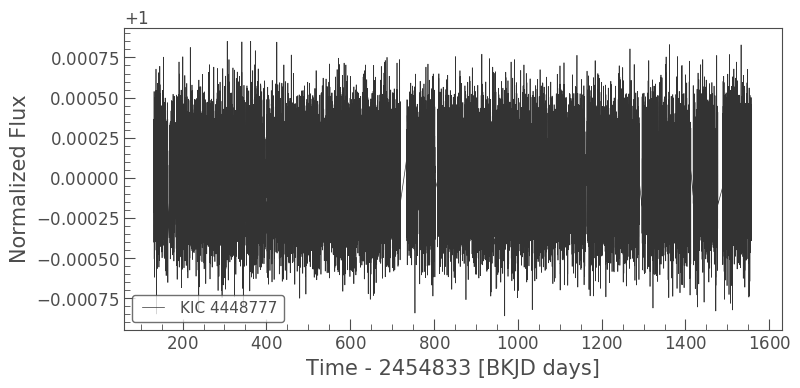

In [4]:
lc = lc.remove_outliers(4)
lc.plot()

In [13]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=100.0).flatten()

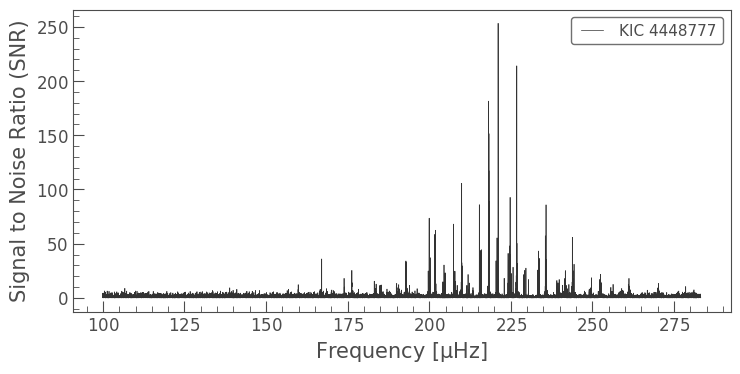

In [14]:
pg.plot()

In [15]:
ep = pb.epsilon()
result = ep(dnu=dnu, numax=numax, teff=teff, bp_rp=bp_rp, bw_fac=1.0)

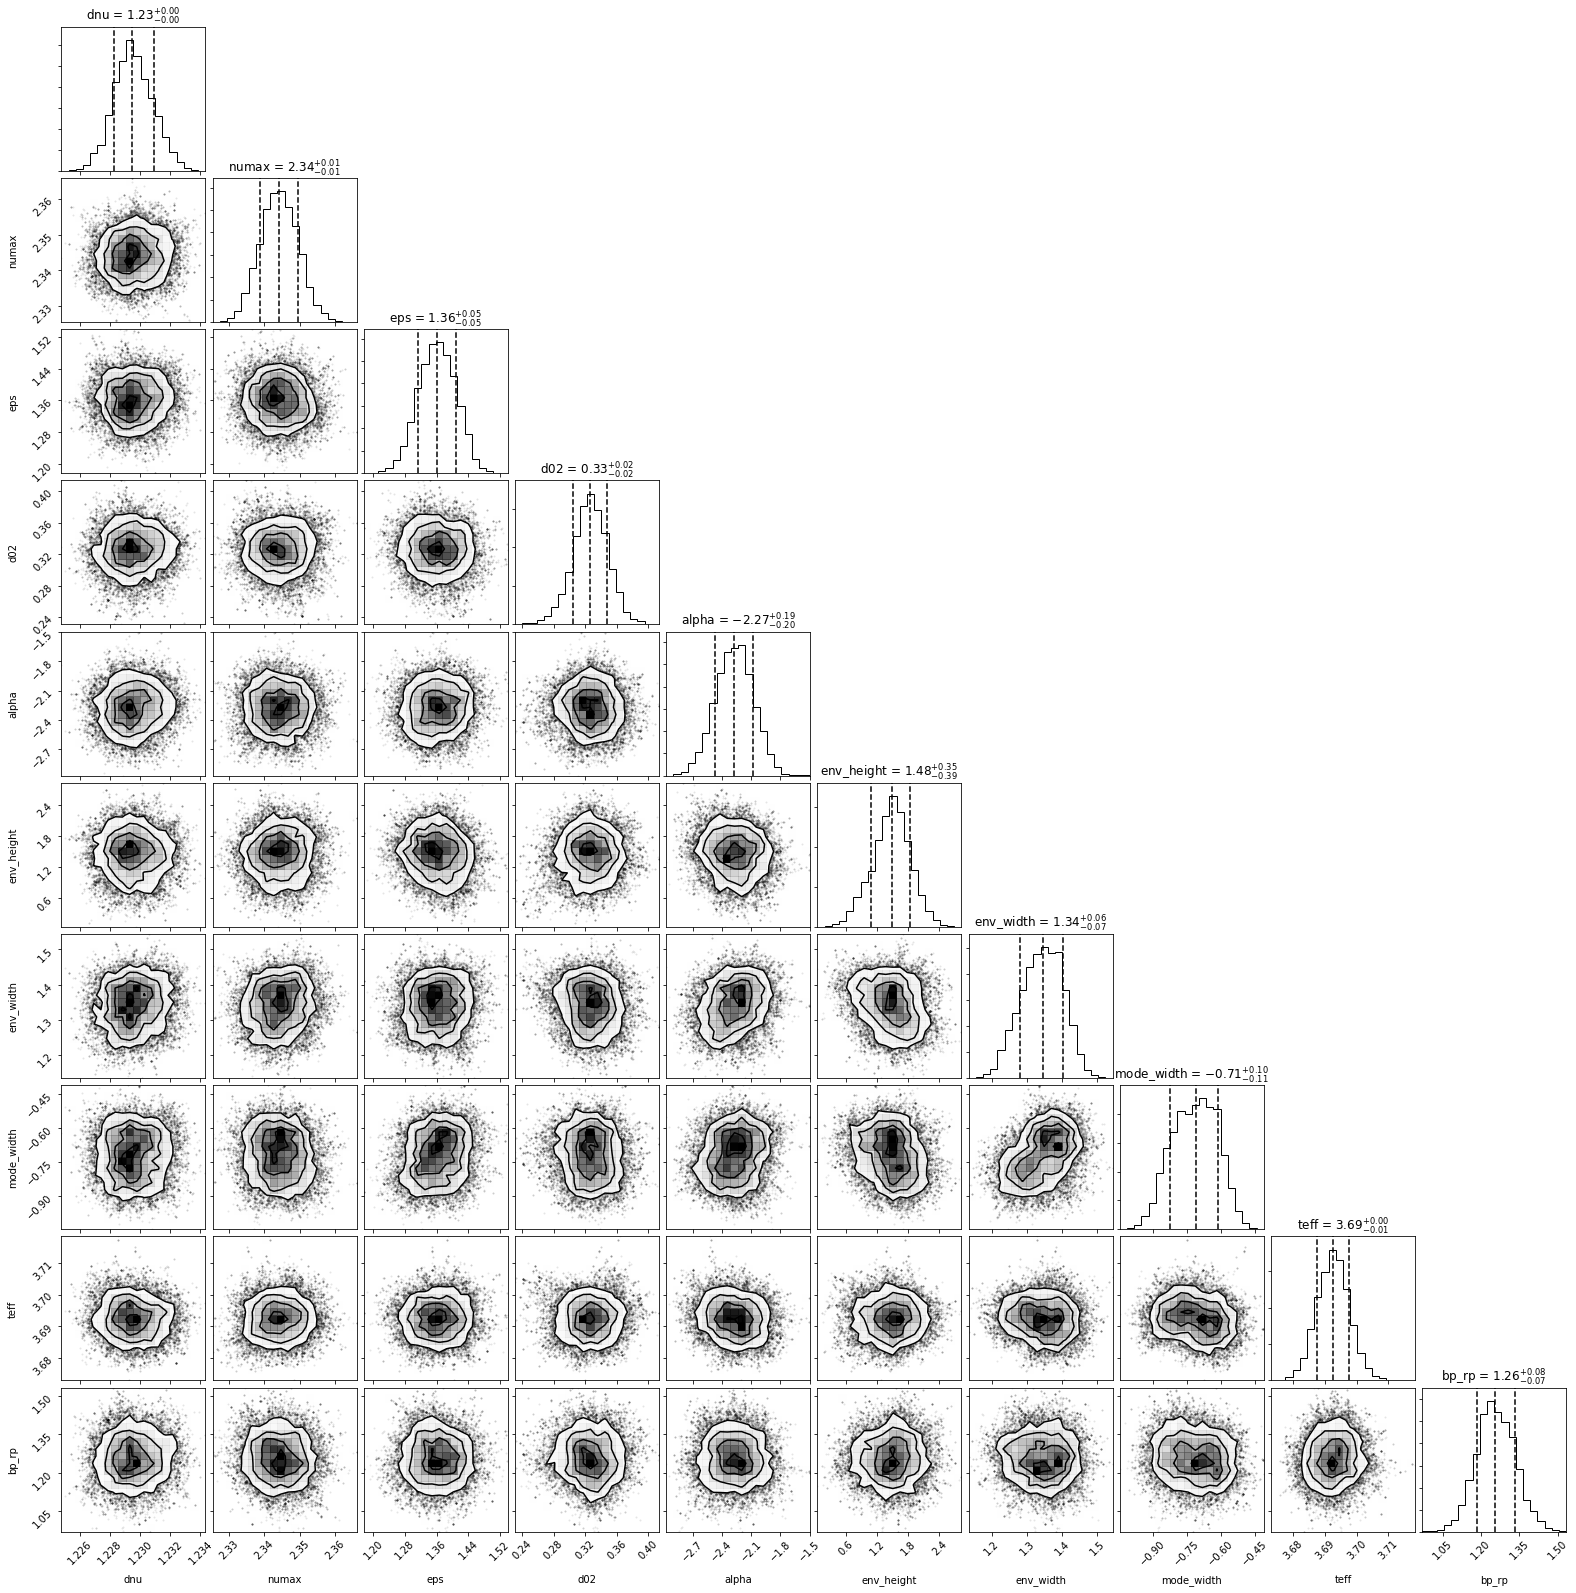

In [16]:
ep.plot_corner();

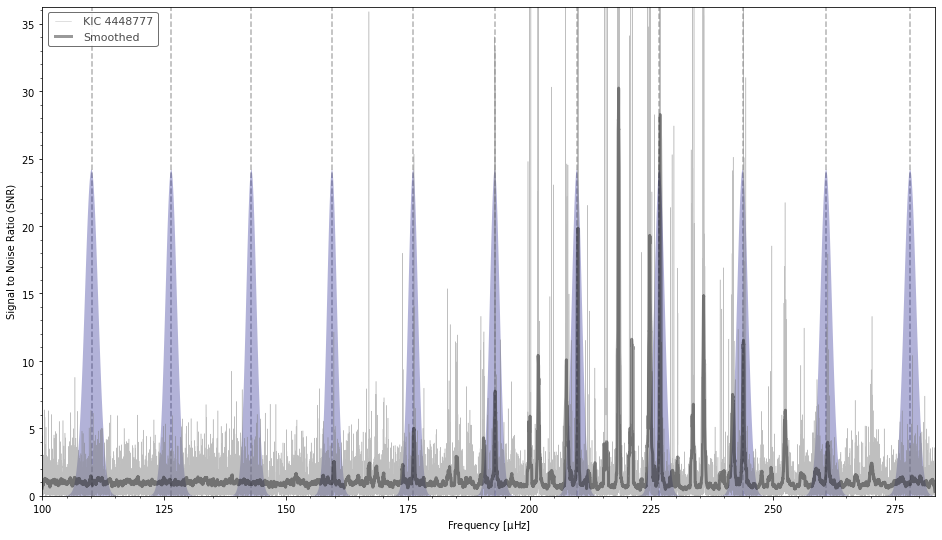

In [17]:
ep.plot(pg);

In [18]:
asy = pb.asy_peakbag.asymptotic_fit(pg.frequency.value, pg.power.value, 
                                    ep.samples, 
                                    teff, bp_rp, 
                                    nthreads=1, norders=10,
                                    store_chains=True)

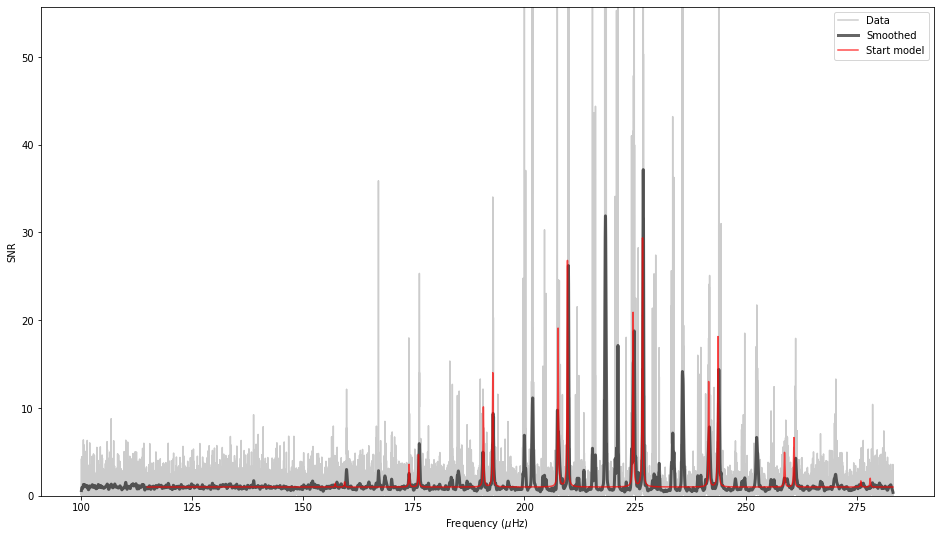

In [19]:
asy.plot_start();

In [20]:
asy_result = asy.run(burnin=1000, niter=1000)

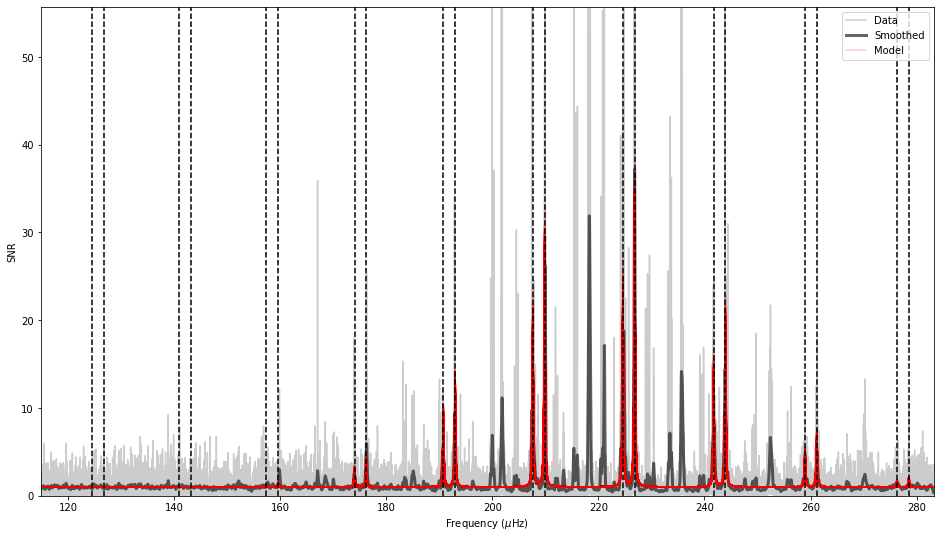

In [21]:
asy.plot();

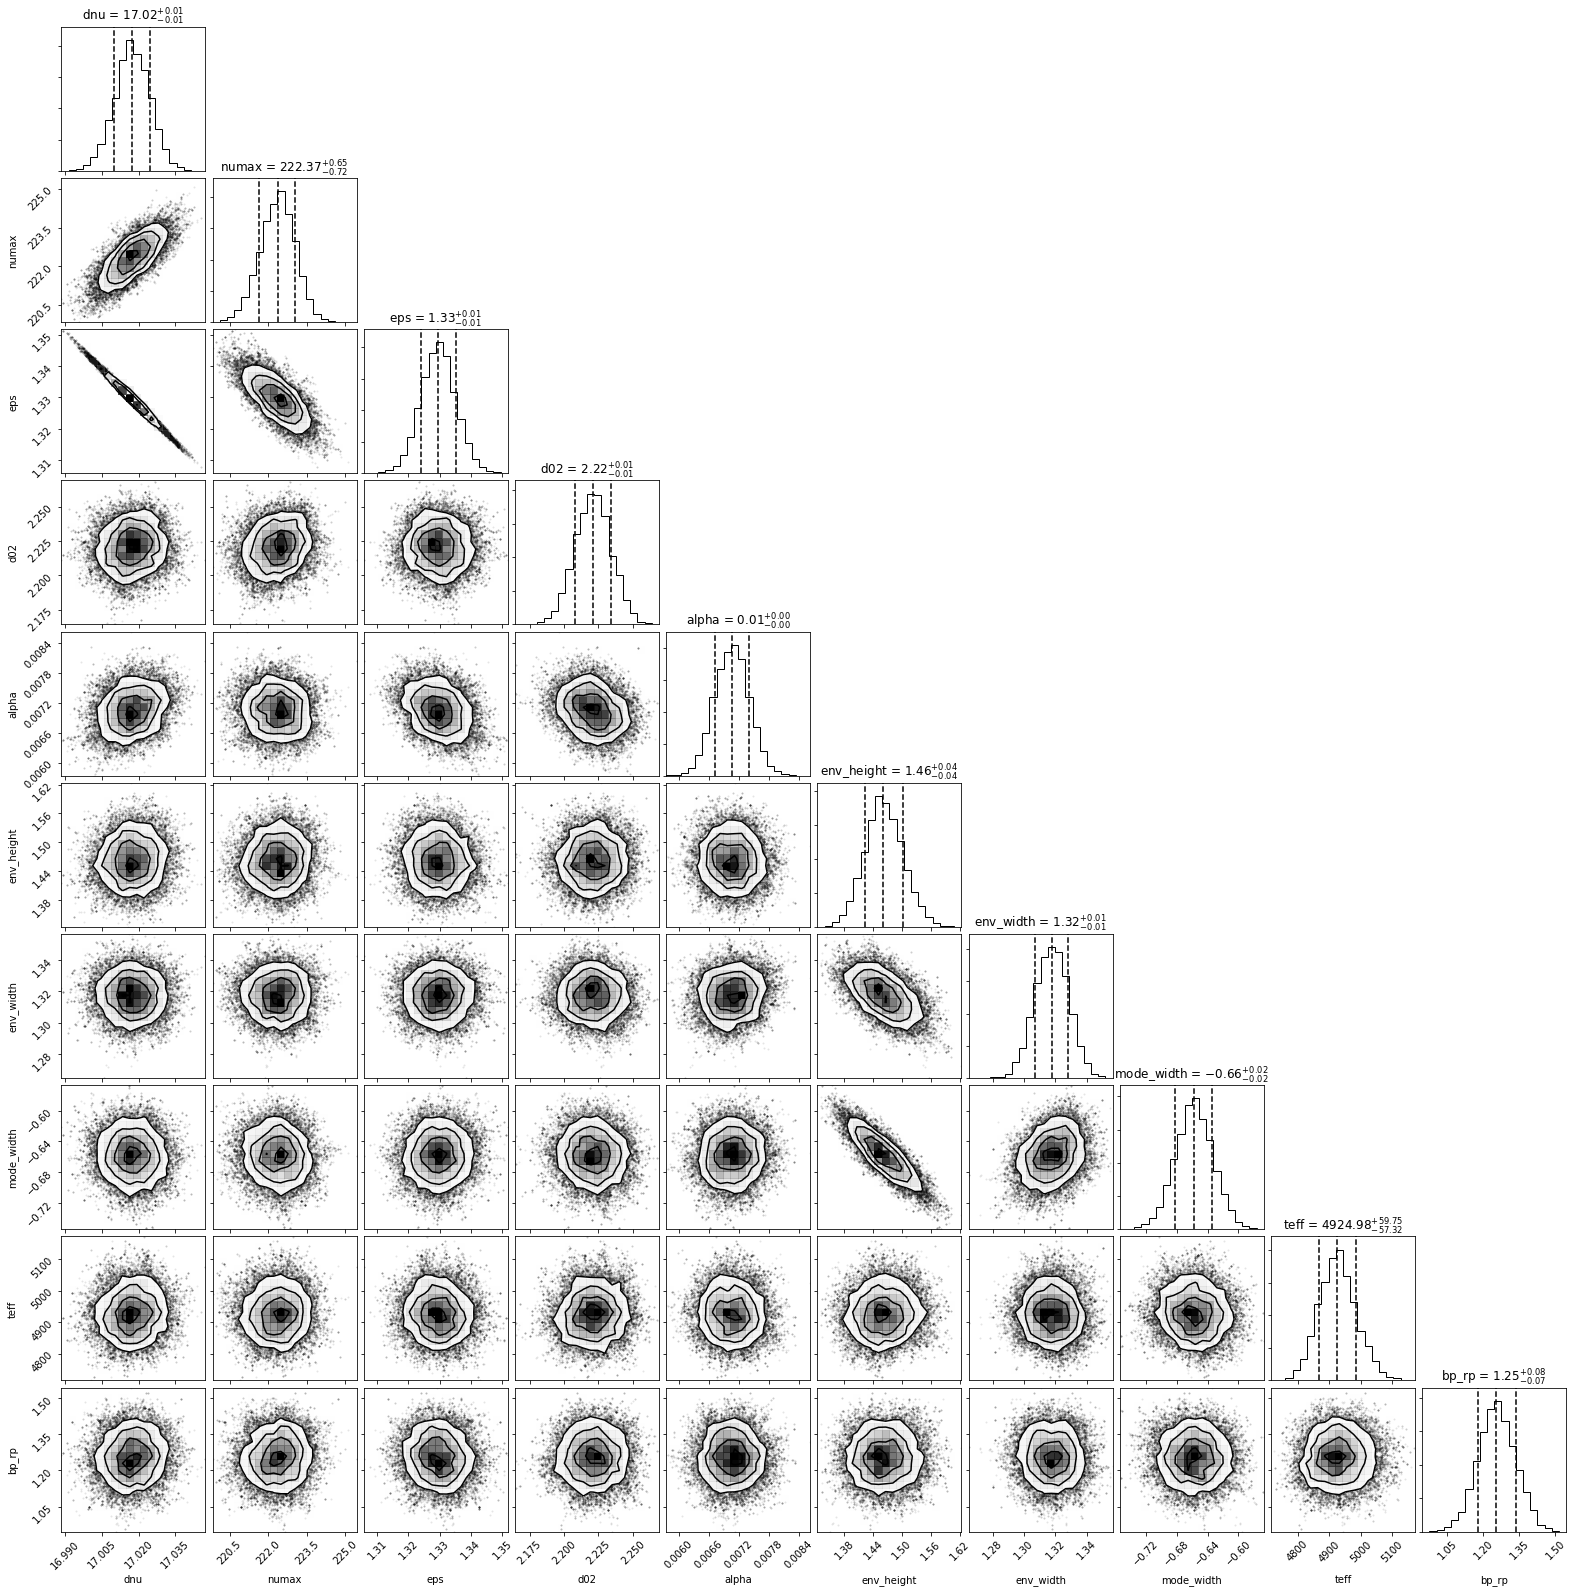

In [22]:
asy.plot_corner();

In [23]:
import pbjam
import importlib
importlib.reload(pbjam)
pbag = pbjam.peakbag(pg.frequency.value, pg.power.value, asy_result)

In [24]:
import pickle

edict = {'f': pg.frequency.value, 'p': pg.power.value, 'a': asy_result}

pickle_out = open("pb.pickle","wb")
pickle.dump(edict, pickle_out)
pickle_out.close()

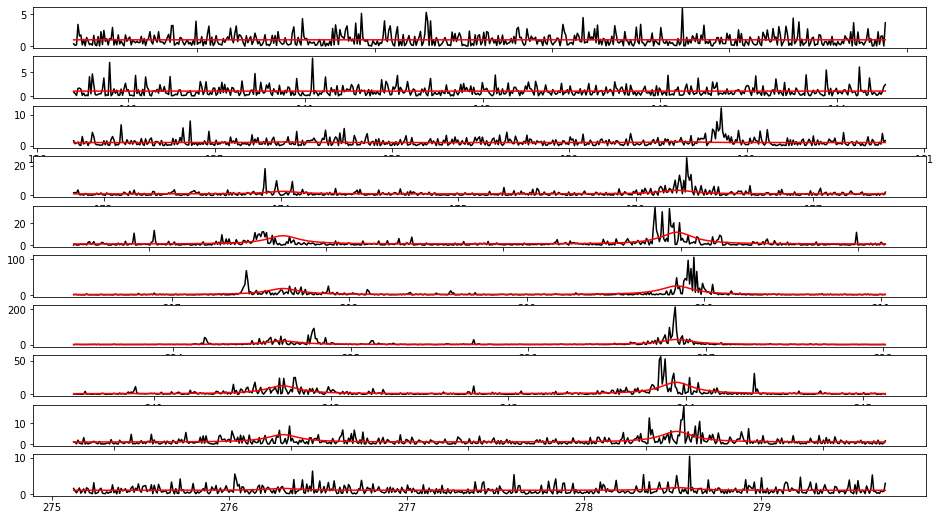

In [25]:
pbag.plot_start_model();

In [26]:
pbag.sample(model_type='simple', cores=4, tune=1500)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [07:14<00:00,  6.72draws/s]
The acceptance probability does not match the target. It is 0.8844754933579762, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains:   1%|          | 79/14000 [00:03<10:28, 22.16draws/s]


ValueError: Not enough samples to build a trace.

In [ ]:
pbag.plot_fit(thin=1);